In [10]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Sklearn R-squared: 0.7790968913766068


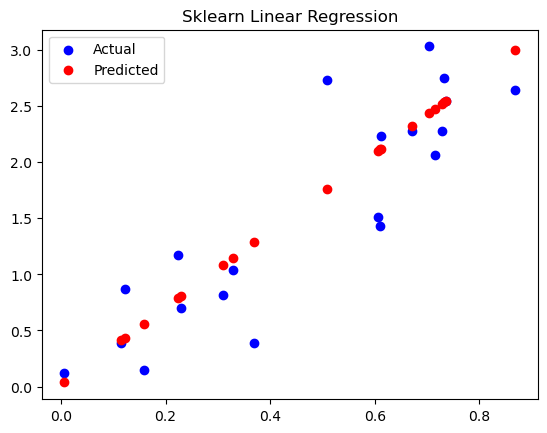

Statsmodels R-squared: 0.7772725434735092


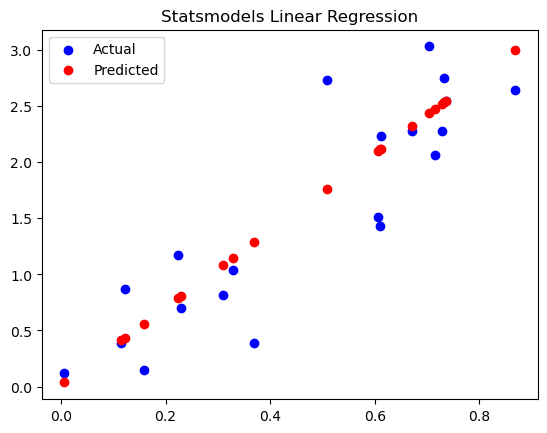

In [11]:
# Define the custom Linear Regression class
class LinearRegressionModel:
    def __init__(self, method='sklearn'):
        if method not in ['sklearn', 'statsmodels']:
            raise ValueError("Method must be either 'sklearn' or 'statsmodels'")
        self.method = method
        self.model = None
    
    def fit(self, X, y):
        if self.method == 'sklearn':
            self.model = SklearnLinearRegression()
            self.model.fit(X, y)
        elif self.method == 'statsmodels':
            X = sm.add_constant(X)  # Add intercept
            self.model = sm.OLS(y, X).fit()
    
    def predict(self, X):
        if self.method == 'sklearn':
            return self.model.predict(X)
        elif self.method == 'statsmodels':
            X = sm.add_constant(X)  # Add intercept
            return self.model.predict(X)
    
    def evaluate(self, X, y):
        predictions = self.predict(X)
        if self.method == 'sklearn':
            return r2_score(y, predictions)
        elif self.method == 'statsmodels':
            return self.model.rsquared

# Generate example data
X = np.random.rand(100, 1)  # 100 samples, 1 feature
y = 3.5 * X.squeeze() + np.random.randn(100) * 0.5  # Linear relation with noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using sklearn
model_sklearn = LinearRegressionModel(method='sklearn')
model_sklearn.fit(X_train, y_train)
predictions_sklearn = model_sklearn.predict(X_test)
r2_sklearn = model_sklearn.evaluate(X_test, y_test)
print(f"Sklearn R-squared: {r2_sklearn}")

# Plot sklearn results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, predictions_sklearn, color='red', label='Predicted')
plt.legend()
plt.title("Sklearn Linear Regression")
plt.show()

# Using statsmodels
model_statsmodels = LinearRegressionModel(method='statsmodels')
model_statsmodels.fit(X_train, y_train)
predictions_statsmodels = model_statsmodels.predict(X_test)
r2_statsmodels = model_statsmodels.evaluate(X_test, y_test)
print(f"Statsmodels R-squared: {r2_statsmodels}")

# Plot statsmodels results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, predictions_statsmodels, color='red', label='Predicted')
plt.legend()
plt.title("Statsmodels Linear Regression")
plt.show()